In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
print('Shape of train ',train.shape)
print(f'shape of test {test.shape} ')

<ipython-input-19-686735eaeaa3>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/train.csv")


Shape of train  (30623, 508)
shape of test (3644, 507) 


In [ ]:
train.sample(4)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
8863,p02_404,p02,15:45:00,6.5,6.5,6.7,6.8,6.9,7.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3
2689,p01_2689,p01,03:50:00,NaN,NaN,4.3,NaN,NaN,4.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.8
25948,p02_17489,p02,17:30:00,5.9,6.0,5.8,5.7,5.6,5.5,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
26899,p02_18440,p02,03:20:00,4.8,4.9,5.0,5.3,5.5,5.6,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4


In [ ]:
test.sample(3)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
2519,p18_50,p18,14:00:00,7.4,7.5,7.8,8.0,8.0,8.2,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,p05_8353,p05,16:45:00,NaN,6.6,NaN,NaN,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3261,p22_79,p22,15:00:00,6.2,6.1,6.2,6.3,6.3,6.2,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
uniq_cols=[]
for i in train.columns:
    col = i.split('-')[0]
    uniq_cols.append(col)
uniq_cols = np.unique(uniq_cols)
print(uniq_cols)

['activity' 'bg' 'bg+1:00' 'cals' 'carbs' 'hr' 'id' 'insulin' 'p_num'
 'steps' 'time']


### On each unique col I am making a separate df to check each features relation with target then startegy for missing values will be developed

In [ ]:
uniq_cols

array(['activity', 'bg', 'bg+1:00', 'cals', 'carbs', 'hr', 'id',
       'insulin', 'p_num', 'steps', 'time'], dtype='<U8')

In [ ]:
## this function will make a separate df for each col see the result to understand
def df_of_col (train,col):
    df = pd.DataFrame()
    for i in train.columns:
        if (i.split('-')[0] ==col) & (i  not in ['hr','bg+1:00','id','p_num']):
            df[i] = train[i]
    return df


In [ ]:
activity_df = df_of_col(train,'activity')
activity_df.head()

,activity-5:55,activity-5:50,activity-5:45,activity-5:40,activity-5:35,activity-5:30,activity-5:25,activity-5:20,activity-5:15,activity-5:10,...,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
activity = df_of_col(train,uniq_cols[0])
bg =  df_of_col(train,uniq_cols[1])
cals =  df_of_col(train,uniq_cols[3])
carbs =  df_of_col(train,uniq_cols[4])
insulin =  df_of_col(train,'insulin')
steps =  df_of_col(train,uniq_cols[-2])
time =  df_of_col(train,uniq_cols[-1])

 ## target feature's distribution

In [ ]:
target = train['bg+1:00']

<ipython-input-28-4a0a9c71c551>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='bg+1:00', ylabel='Density'>

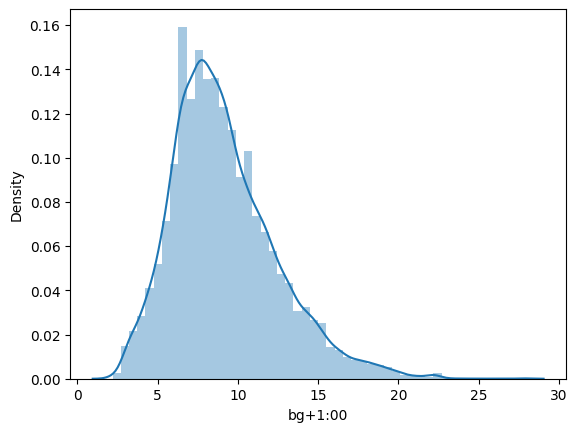

In [ ]:
sns.distplot(target)

In [ ]:
print(f'skewness in bg+1:00 is {target.skew()}')

skewness in bg+1:00 is 0.8672740570590263


## activity features and target

In [ ]:
activity_missing_percentage = activity.isnull().mean() * 100
print(activity_missing_percentage)
print("------------------------------------------------------------------------------")
print(f'mean percentage for missing values is {np.mean(activity_missing_percentage)}')

activity-5:55    98.275806
activity-5:50    98.301930
activity-5:45    98.318258
activity-5:40    98.288868
activity-5:35    98.305195
                   ...    
activity-0:20    98.217026
activity-0:15    98.272540
activity-0:10    98.236620
activity-0:05    98.217026
activity-0:00    98.262744
Length: 72, dtype: float64
------------------------------------------------------------------------------
mean percentage for missing values is 98.29013776863432


In [ ]:
print(f'on average this much values are missing for activity columns : {np.mean(activity.isnull().sum())}')

on average this much values are missing for activity columns : 30099.38888888889


#### so its better to drop alll columns of activity from training

In [ ]:
train_preprocessed = train.drop(columns=activity.columns)
test_preprocessed = test.drop(columns=activity.columns)

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate
features = pd.Series(['bg','cals','carbs','insulin','steps'])
fe_list = [bg,cals,carbs,insulin,steps]
mean_skewness = [np.mean(i.skew()) for i in fe_list]
table_data = list(zip(features,mean_skewness))
headers = ['Feature','Avg_skewness']
table = tabulate(table_data,headers,tablefmt='pretty')
print(table)

+---------+--------------------+
| Feature |    Avg_skewness    |
+---------+--------------------+
|   bg    | 0.936330041670462  |
|  cals   | 3.7044268390111057 |
|  carbs  |  9.78057725816238  |
| insulin | 9.423695962116149  |
|  steps  | 2.9996472673034527 |
+---------+--------------------+


## Null Value Analaysis

In [ ]:
from tabulate import tabulate
features = pd.Series(['bg','cals','carbs','insulin','steps'])
fe_list = [bg,cals,carbs,insulin,steps]
mean_nulls = [np.mean(i.isnull().sum()) for i in fe_list]
mean_percents =[np.mean(i.isnull().mean()*100) for i in fe_list]
table_data = list(zip(features,mean_nulls,mean_percents))
headers = ['Feature','Avg_nulls','Avg_null_percents']
table = tabulate(table_data,headers,tablefmt='pretty')
print(table)

+---------+--------------------+--------------------+
| Feature |     Avg_nulls      | Avg_null_percents  |
+---------+--------------------+--------------------+
|   bg    | 5970.013888888889  | 19.495196058155273 |
|  cals   | 15787.388888888889 | 51.55402438980142  |
|  carbs  | 30210.027777777777 | 98.65143120457753  |
| insulin |        0.0         |        0.0         |
|  steps  | 21166.36111111111  | 69.11916243056235  |
+---------+--------------------+--------------------+


### as carbs also have almost all missing data so dropping it

In [ ]:
train_preprocessed = train_preprocessed.drop(columns=carbs.columns)
test_preprocessed = test_preprocessed.drop(columns=carbs.columns)

In [ ]:
train_preprocessed.shape

(30623, 364)

In [ ]:
### you will see in further correlation analysis that steps have negligible relation with target and 53%  missing values on average so dropping all steps
train_preprocessed = train_preprocessed.drop(columns=steps.columns)
test_preprocessed = test_preprocessed.drop(columns=steps.columns)

In [ ]:
cals_missing = train_preprocessed[cals.columns].isnull().any(axis=1)
bg_missing = train_preprocessed[bg.columns].isnull().any(axis=1)  # Replace bg_columns with actual bg column names
insulin_missing = train_preprocessed[insulin.columns].isnull().any(axis=1)  # Replace insulin_columns with actual insulin column names

# Find rows where all three categories are missing
all_missing = cals_missing & bg_missing & insulin_missing

print("Rows with all cals, bg, and insulin missing:", all_missing.sum())
print("Rows with only cals missing:", cals_missing.sum() - all_missing.sum())



Rows with all cals, bg, and insulin missing: 0
Rows with only cals missing: 21668


In [ ]:
test_preprocessed.shape

(3644, 291)

### remaining null values will be imputed

## Correlation analysis

In [ ]:
features = pd.Series(['bg', 'cals', 'insulin'])
fe_list = ['bg', 'cals', 'insulin']  # These are column prefixes

mean_skewness = [
    np.mean(train_preprocessed.filter(like=col_prefix).skew()) for col_prefix in fe_list
]

# Create table with results
table_data = list(zip(features, mean_skewness))
headers = ['Feature', 'Avg_skewness']
table = tabulate(table_data, headers, tablefmt='pretty')

print(table)


+---------+--------------------+
| Feature |    Avg_skewness    |
+---------+--------------------+
|   bg    | 0.9353840692785244 |
|  cals   | 3.7044268390111075 |
| insulin | 9.423695962116149  |
+---------+--------------------+


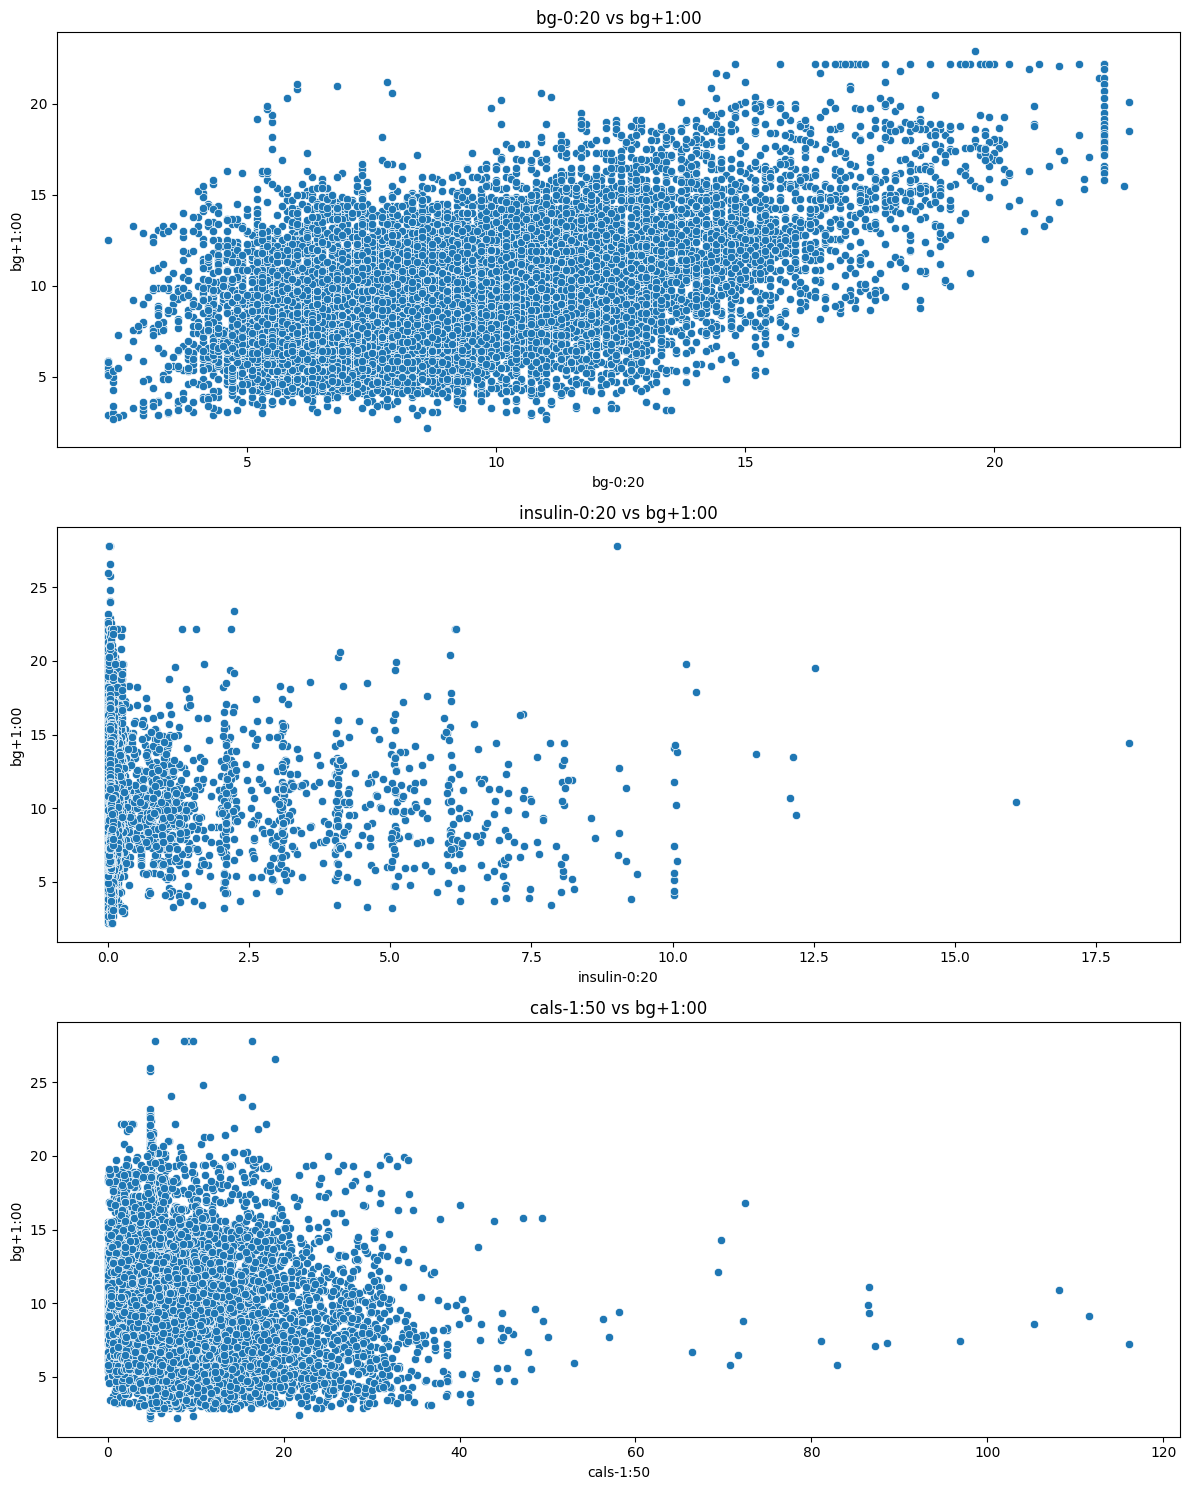

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(12, 15))  # Adjusted for 3 rows and 1 column

# Plot each scatter plot in a separate subplot
sns.scatterplot(x='bg-0:20', y='bg+1:00', data=train_preprocessed, ax=ax[0])
sns.scatterplot(x='insulin-0:20', y='bg+1:00', data=train_preprocessed, ax=ax[1])
sns.scatterplot(x='cals-1:50', y='bg+1:00', data=train_preprocessed, ax=ax[2])

# Add titles and adjust layout
ax[0].set_title('bg-0:20 vs bg+1:00')
ax[1].set_title('insulin-0:20 vs bg+1:00')
ax[2].set_title('cals-1:50 vs bg+1:00')

plt.tight_layout()
plt.show()


### Why We Are Using Spearman Correlation

We chose Spearman correlation to assess the relationship between **bg**, **cals**, and **insulin** features with the target due to two key factors:

1. **Skewness in Data**:
   - The target variable has a skewness of **1.07**, and the average skewness in the insulin features is **1.06**, indicating a non-normal distribution across these variables. Both the **bg** and **cals** feature sets also exhibit similar skewness levels, reinforcing the choice to use Spearman correlation. Unlike Pearson correlation, which is sensitive to skewed data, Spearman correlation is robust against non-normal distributions, making it a better fit for our data.

2. **Non-linear Relationship**:
   - The scatterplots between key features like **bg['bg-0:20']**, **cals['cals-1:50']**, **insulin['insulin-0:20']**, and the target demonstrate non-linear, monotonic relationships rather than clear linear patterns. Spearman correlation captures monotonic relationships, even if they are not strictly linear, making it more suitable for assessing the associations within our data.

In summary, Spearman correlation offers a robust approach that accounts for both the skewness and the monotonic relationships observed between the features and the target.
context.

In [ ]:
bg_corr_spearman = bg.corrwith(target, method='spearman').sort_values(ascending=False)
cals_corr_spearman = cals.corrwith(target, method='spearman').sort_values(ascending=False)
insulin_corr_spearman = insulin.corrwith(target, method='spearman').sort_values(ascending=False)

# Print Spearman correlations for bg
print("Spearman Correlations for bg:")
print(bg_corr_spearman)
print(f'min bg_corr_spearman is {bg_corr_spearman.min()}')
print(f'max bg_corr_spearman is {bg_corr_spearman.max()}')
print(f'mean bg_corr_spearman is {bg_corr_spearman.mean()}\n')

Spearman Correlations for bg:
bg-0:00    0.619416
bg-0:05    0.550696
bg-0:15    0.533656
bg-0:10    0.517183
bg-0:20    0.468355
             ...   
bg-4:25   -0.028994
bg-4:10   -0.028995
bg-4:40   -0.029795
bg-5:10   -0.030215
bg-4:55   -0.031258
Length: 72, dtype: float64
min bg_corr_spearman is -0.03125774190109502
max bg_corr_spearman is 0.6194158865873247
mean bg_corr_spearman is 0.13106828816030758



In [ ]:
print("Spearman Correlations:")
print(cals_corr_spearman)
print(f'min cals_corr_spearman is {cals_corr_spearman.min()}')
print(f'max bg_corr_spearman is {cals_corr_spearman.max()}')
print(f' mean calsinsulin_corr_spearman is {cals_corr_spearman.mean()} ')

Spearman Correlations:
cals-5:45   -0.072116
cals-5:50   -0.072723
cals-5:55   -0.075386
cals-5:35   -0.078220
cals-5:30   -0.079828
               ...   
cals-0:20   -0.142855
cals-0:15   -0.146013
cals-0:10   -0.152917
cals-0:05   -0.154994
cals-0:00   -0.158234
Length: 72, dtype: float64
min cals_corr_spearman is -0.15823382341218437
max bg_corr_spearman is -0.07211589477221453
 mean calsinsulin_corr_spearman is -0.11698453925376248 


In [ ]:
print("Spearman Correlations for insulin:")
print(insulin_corr_spearman)
print(f'min insulin_corr_spearman is {insulin_corr_spearman.min()}')
print(f'max insulin_corr_spearman is {insulin_corr_spearman.max()}')
print(f'mean insulin_corr_spearman is {insulin_corr_spearman.mean()}')

Spearman Correlations for insulin:
insulin-0:00    0.242955
insulin-0:05    0.227001
insulin-0:10    0.212030
insulin-0:15    0.200939
insulin-0:20    0.189460
                  ...   
insulin-4:20    0.037997
insulin-3:45    0.037743
insulin-4:05    0.036642
insulin-4:15    0.036206
insulin-4:00    0.035863
Length: 72, dtype: float64
min insulin_corr_spearman is 0.035863155403194735
max insulin_corr_spearman is 0.2429548308135868
mean insulin_corr_spearman is 0.08627340284862951


In [ ]:
cals_insulin_corr = train_preprocessed[cals.columns].corrwith(train_preprocessed[insulin.columns].mean(axis=1), method='spearman').sort_values(ascending=False)
print("Spearman Correlations between cals and insulin:")
print(cals_insulin_corr)
print(f"Min correlation between cals and insulin: {cals_insulin_corr.min()}")
print(f"Max correlation between cals and insulin: {cals_insulin_corr.max()}")
print(f"Mean correlation between cals and insulin: {cals_insulin_corr.mean()}")

Spearman Correlations between cals and insulin:
cals-0:00   -0.106426
cals-0:05   -0.109262
cals-0:10   -0.114303
cals-0:15   -0.116735
cals-0:20   -0.122261
               ...   
cals-5:35   -0.230911
cals-5:50   -0.231384
cals-5:40   -0.231533
cals-5:25   -0.231757
cals-5:55   -0.231830
Length: 72, dtype: float64
Min correlation between cals and insulin: -0.23182956435832902
Max correlation between cals and insulin: -0.10642627845247417
Mean correlation between cals and insulin: -0.17802971467945927


In [ ]:
cals_bg_corr = train_preprocessed[cals.columns].corrwith(train_preprocessed[bg.columns].mean(axis=1), method='spearman').sort_values(ascending=False)
print("\nSpearman Correlations between cals and bg:")
print(cals_bg_corr)
print(f"Min correlation between cals and bg: {cals_bg_corr.min()}")
print(f"Max correlation between cals and bg: {cals_bg_corr.max()}")
print(f"Mean correlation between cals and bg: {cals_bg_corr.mean()}")


Spearman Correlations between cals and bg:
cals-0:00   -0.086194
cals-0:05   -0.091259
cals-0:10   -0.095595
cals-0:15   -0.096763
cals-0:20   -0.101859
               ...   
cals-3:40   -0.183206
cals-4:25   -0.183355
cals-4:00   -0.183552
cals-4:10   -0.184795
cals-3:55   -0.184862
Length: 72, dtype: float64
Min correlation between cals and bg: -0.1848622585025881
Max correlation between cals and bg: -0.0861939705386027
Mean correlation between cals and bg: -0.15875917320032476


### Rationale for Dropping `cals` Features

The `cals` features were dropped due to their minimal correlation with the target variable, `bg`. The Spearman correlation between `cals` and `bg` remained consistently low (mean ≈ -0.043), indicating negligible predictive value. Retaining low-impact features can introduce noise, increase model complexity, and affect training efficiency. By removing `cals`, we focus on the most relevant features, streamlining the model and potentially improving its performance without sacrificing predictive accuracy.


In [ ]:
train_preprocessed = train_preprocessed.drop(columns=cals.columns)
test_preprocessed = test_preprocessed.drop(columns=cals.columns)

In [ ]:
steps_corr_spearman = steps.corrwith(target, method='spearman').sort_values(ascending=False)
print(f'min steps_corr_spearman is {steps_corr_spearman.min()}')
print(f'maxsteps_corr_spearman is {steps_corr_spearman.max()}')
print(f' mean calsinsulin_corr_spearman is {steps_corr_spearman.mean()} ')

min steps_corr_spearman is -0.022530730470718137
maxsteps_corr_spearman is 0.06741948554701317
 mean calsinsulin_corr_spearman is 0.037198522423171135 


### why we dropped steps too

In [ ]:
np.mean(train_preprocessed[insulin.columns].skew())

9.423695962116149

# Feature engineering pipeline

In [ ]:
train_preprocessed.drop(columns=['id','p_num','time'],inplace=True)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
x = train_preprocessed.drop(columns=['bg+1:00'])
y = train_preprocessed['bg+1:00']

# Assuming X_train is your DataFrame
# Extract only the numeric columns from the DataFrame
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Select numerical and categorical features
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = x.select_dtypes(include='object').columns.tolist()  # Use 'x' instead of 'x_train'

# Define the numerical pipeline (impute missing values + apply power transformation)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer(method='yeo-johnson'))
])

# Create the ColumnTransformer to apply the numerical pipeline to the numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numeric_features),
    ]
)

# Fit the preprocessor on the training data and then transform the training and test data
X_train = preprocessor.fit_transform(x_train)  # Fit and transform on training data
X_test = preprocessor.transform(x_test)       # Only transform on test data

# You can check the transformed data
print(X_train)
print(X_test)

[[ 0.77018007  0.64265069  0.62806791 ...  0.02305652  0.02353275
   0.0230397 ]
 [-0.70047012 -0.63745825 -0.7183174  ...  0.29533503  0.88548938
  -1.23231772]
 [-1.40995724 -1.21258835 -1.29950531 ...  0.02305652  0.02353275
   0.0230397 ]
 ...
 [-0.00720714 -0.02081933 -0.99769883 ...  0.29533503  0.45183366
   0.25064847]
 [-1.40995724 -1.16125092 -1.14557026 ...  0.02305652  0.02353275
   0.0230397 ]
 [ 0.65751717  0.61037338  0.53231129 ... -0.0710902   0.06987802
   0.0230397 ]]
[[-0.00720714  2.34513723 -0.02319245 ...  0.28649502  0.12494115
   0.70177168]
 [-0.05283742 -0.05903759 -0.06074536 ...  0.02305652  0.02353275
   0.0230397 ]
 [ 0.29791768  0.16488522  0.05082184 ...  0.02305652  0.02353275
   0.0230397 ]
 ...
 [-0.5936063  -0.5060863  -0.50032067 ...  0.38287581 -0.16616017
  -0.13769324]
 [-0.43855642 -0.2965236  -0.21477281 ...  0.02305652  0.02353275
   0.0230397 ]
 [-1.28264962 -1.06058372 -1.0463458  ...  1.66843293  0.87765343
   0.0230397 ]]


In [ ]:
test_preprocessed = preprocessor.fit_transform(test_preprocessed)

In [ ]:
test_preprocessed

array([[-0.03852284,  0.40591356, -0.0352376 , ..., -2.12232265,
        -2.13109195, -2.153484  ],
       [-0.03852284, -0.03881789,  0.61328188, ...,  2.2192711 ,
         1.63859522,  2.45532355],
       [-0.03852284, -1.27392109, -0.0352376 , ..., -0.20448235,
         0.85292555, -0.03533245],
       ...,
       [ 1.49214895,  1.34499149,  1.33898776, ..., -0.00436296,
         0.00315686,  0.01169752],
       [ 0.1357429 ,  0.07926309,  0.04113549, ..., -0.45773691,
        -0.44544841, -0.44652894],
       [ 0.74489976,  0.69731837,  0.64325877, ..., -0.03575069,
        -0.52331168, -0.24471783]])

# Feature selection

In [ ]:
pip install optuna xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


# RFE for feature selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# ------------------------- Feature Selection with RFE -------------------------
selector_model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=selector_model)  # Adjust feature count as needed

# Handle missing values in y_train
# Option 1: Remove rows with missing values
# y_train = y_train.dropna()
# X_train = X_train[y_train.index]  # Update X_train to match y_train index

# Option 2: Impute missing values with a suitable strategy (e.g., mean, median)
y_train = y_train.fillna(y_train.mean()) # or y_train.median()

# Now you can apply RFE
X_train = rfe.fit_transform(X_train, y_train)

# Important features

In [ ]:
importances = rfe.estimator_.feature_importances_
# Get the original feature names from before RFE transformation
original_feature_names = train_preprocessed.columns  # Assuming 'features' holds your original column names

# Ensure rfe.support_ and original_feature_names have the same length
# This assumes one feature was dropped during preprocessing before RFE.
# Adjust if more features were dropped.
if len(rfe.support_) != len(original_feature_names):
    # Remove the feature that was dropped from original_feature_names
    # This assumes the dropped feature is the last one.
    original_feature_names = original_feature_names[:-1]

# Get the selected feature names using boolean indexing with rfe.support_
selected_features = original_feature_names[rfe.support_]

for feature, importance in zip(selected_features, importances):
    print(f"{feature}: {importance}")

# Use of optuna for model selection

In [ ]:
import optuna
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Choose the algorithm to tune
    regressor_name = trial.suggest_categorical('regressor', ['XGBoost', 'LightGBM', 'CatBoost'])

    if regressor_name == 'XGBoost':
        # XGBoost hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 100, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        min_child_weight = trial.suggest_float('min_child_weight', 1, 10)
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

        model = XGBRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

    elif regressor_name == 'LightGBM':
        # LightGBM hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 100, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        num_leaves = trial.suggest_int('num_leaves', 20, 150)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 10, 50)
        feature_fraction = trial.suggest_float('feature_fraction', 0.5, 1.0)

        model = LGBMRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            max_depth=max_depth,
            min_data_in_leaf=min_data_in_leaf,
            feature_fraction=feature_fraction,
            random_state=42
        )

    elif regressor_name == 'CatBoost':
        # CatBoost hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 100, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
        depth = trial.suggest_int('depth', 3, 12)
        l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 10)
        bagging_temperature = trial.suggest_float('bagging_temperature', 0.0, 1.0)

        model = CatBoostRegressor(
            iterations=n_estimators,
            learning_rate=learning_rate,
            depth=depth,
            l2_leaf_reg=l2_leaf_reg,
            bagging_temperature=bagging_temperature,
            random_state=42,
            verbose=0  # Prevents CatBoost logs
        )

    # Perform cross-validation and return the mean RMSE (negative RMSE is used to maximize performance)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()
    return score


In [ ]:
# Create a study and optimize it using CmaEsSampler
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

In [ ]:
# Retrieve the best trial
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)

In [ ]:
# Retrieve the best trial parameters
best_params = study.best_trial.params

# Remove the 'regressor' key from best_params as it's not a valid parameter for CatBoostRegressor
catboost_params = {k: v for k, v in best_params.items() if k != 'regressor'}

# Instantiate the best model based on the best trial's parameters
if best_params['regressor'] == 'XGBoost':
    model = XGBRegressor(**best_params, random_state=42)  # Unpack best_params for XGBoost
elif best_params['regressor'] == 'LightGBM':
    model = LGBMRegressor(**best_params, random_state=42) # Unpack best_params for LightGBM
elif best_params['regressor'] == 'CatBoost':
    model = CatBoostRegressor(**catboost_params, random_state=42, verbose=0)  # Unpack catboost_params for CatBoost


# Fit the model to the training data
model.fit(X_train, y_train)

# Now you can use the model for prediction
bg = model.predict(test_preprocessed)
print(len(bg))

# voting ensemble for increasing accuracy

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Define a function to optimize models using Optuna
def optimize_model(trial, model_type):
    if model_type == 'xgboost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        }
        model = XGBRegressor(**params)

    elif model_type == 'lightgbm':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'num_leaves': trial.suggest_int('num_leaves', 20, 150),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        }
        model = LGBMRegressor(**params)

    elif model_type == 'catboost':
        params = {
            'iterations': trial.suggest_int('iterations', 50, 200),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 4, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        }
        model = CatBoostRegressor(**params, verbose=0)

    elif model_type == 'randomforest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        }
        model = RandomForestRegressor(**params)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

# Run Optuna optimization for each model
def optimize_with_optuna(model_type):
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: optimize_model(trial, model_type), n_trials=20)
    print(f"Best params for {model_type}: {study.best_params}")
    return study.best_params

# Optimize and get best parameters
best_params_xgb = optimize_with_optuna('xgboost')
best_params_lgb = optimize_with_optuna('lightgbm')
best_params_catboost = optimize_with_optuna('catboost')
best_params_rf = optimize_with_optuna('randomforest')

# Initialize optimized models
xgb_model = XGBRegressor(**best_params_xgb)
lgb_model = LGBMRegressor(**best_params_lgb)
catboost_model = CatBoostRegressor(**best_params_catboost, verbose=0)
rf_model = RandomForestRegressor(**best_params_rf)

# Create and train the Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('lightgbm', lgb_model),
    ('catboost', catboost_model),
    ('randomforest', rf_model)
])

voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, y_pred)
print(f'Voting Ensemble MSE: {mse}')


In [ ]:
df = pd.DataFrame()
t = pd.read_csv('/content/test.csv')
df['id'] = t['id']
df['bg+1:00'] = bg
df.to_csv('submission.csv')

In [ ]:
df